In [1]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import numpy as np
import random
from typing import Dict, Any, Tuple, List, Union

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras_tuner import BayesianOptimization

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pylab as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Heart_disease_cleveland_new.csv')
data.rename(columns = {'condition':'target'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
categorys= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_encoded = pd.get_dummies(data, columns=categorys)
data = df_encoded
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
1,67,160,286,108,1.5,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,120,229,129,2.6,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130,250,187,3.5,0,False,True,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,130,204,172,1.4,0,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,False,True,True,False,...,False,True,False,True,False,False,False,False,False,True
299,68,144,193,141,3.4,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
300,57,130,131,115,1.2,1,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,236,174,0.0,1,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [5]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
1,67,160,286,108,1.5,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,120,229,129,2.6,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130,250,187,3.5,0,False,True,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,130,204,172,1.4,0,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,False,True,True,False,...,False,True,False,True,False,False,False,False,False,True
299,68,144,193,141,3.4,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
300,57,130,131,115,1.2,1,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,236,174,0.0,1,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    bool   
 7   sex_1      303 non-null    bool   
 8   cp_0       303 non-null    bool   
 9   cp_1       303 non-null    bool   
 10  cp_2       303 non-null    bool   
 11  cp_3       303 non-null    bool   
 12  fbs_0      303 non-null    bool   
 13  fbs_1      303 non-null    bool   
 14  restecg_0  303 non-null    bool   
 15  restecg_1  303 non-null    bool   
 16  restecg_2  303 non-null    bool   
 17  exang_0    303 non-null    bool   
 18  exang_1    303 non-null    bool   
 19  slope_0    303 non-null    bool   
 20  slope_1   

In [7]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
1,67,160,286,108,1.5,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,120,229,129,2.6,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130,250,187,3.5,0,False,True,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,130,204,172,1.4,0,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False


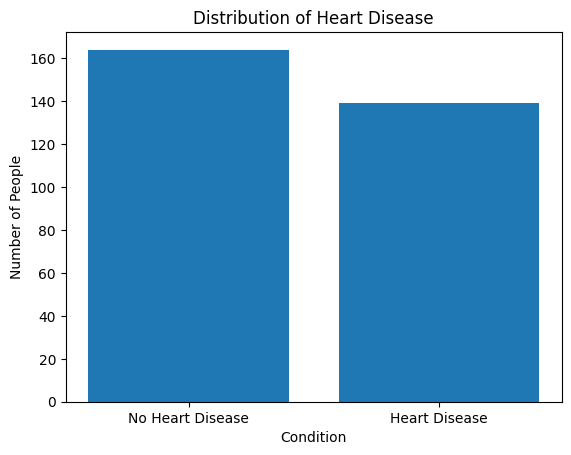

In [ ]:
counts = data['target'].value_counts()

plt.bar(['No Heart Disease', 'Heart Disease'], counts.values)
plt.xlabel('Condition')
plt.ylabel('Number of People')
plt.title('Distribution of Heart Disease')
plt.show()

In [ ]:
counts

target
0    164
1    139
Name: count, dtype: int64

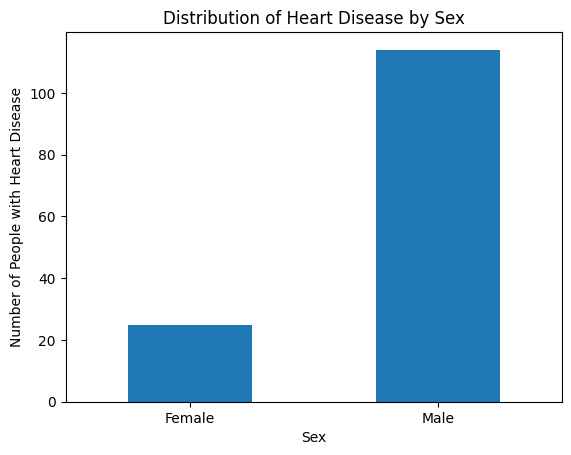

In [ ]:
counts = data.groupby(['sex', 'target']).size().unstack()

counts = counts[1]

counts.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Number of People with Heart Disease')
plt.title('Distribution of Heart Disease by Sex')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.show()


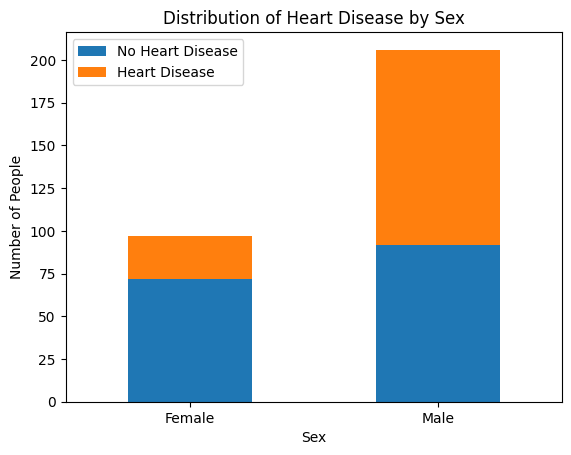

In [ ]:
counts = data.groupby(['sex', 'target']).size().unstack()

counts.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.title('Distribution of Heart Disease by Sex')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.show()

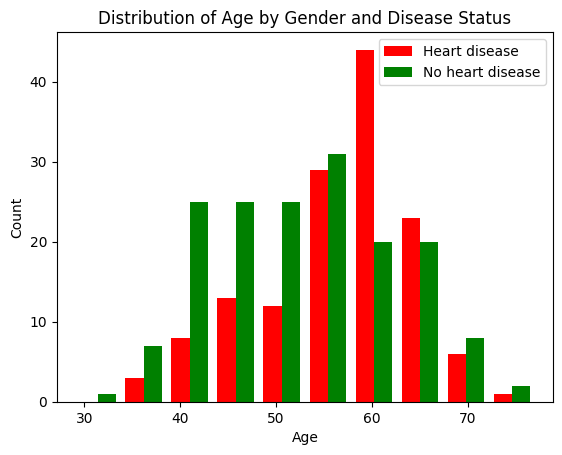

In [ ]:
sick = data[data['target'] == 1]
healthy = data[data['target'] == 0]

plt.hist([sick['age'], healthy['age']], bins=10, color=['red', 'green'], label=['Heart disease', 'No heart disease'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Gender and Disease Status')
plt.legend()
plt.show()

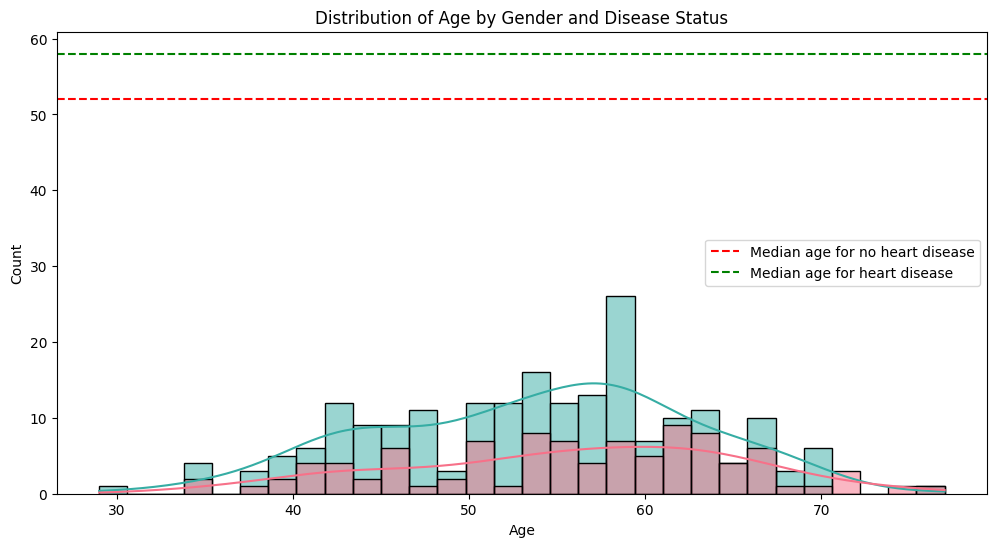

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data, x='age', hue='sex', kde=True, bins=30, palette='husl')

plt.axhline(y=data[data['target']==0]['age'].median(), color='red', linestyle='--', label='Median age for no heart disease')
plt.axhline(y=data[data['target']==1]['age'].median(), color='green', linestyle='--', label='Median age for heart disease')

plt.legend()
plt.title('Distribution of Age by Gender and Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.458746
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.499120
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


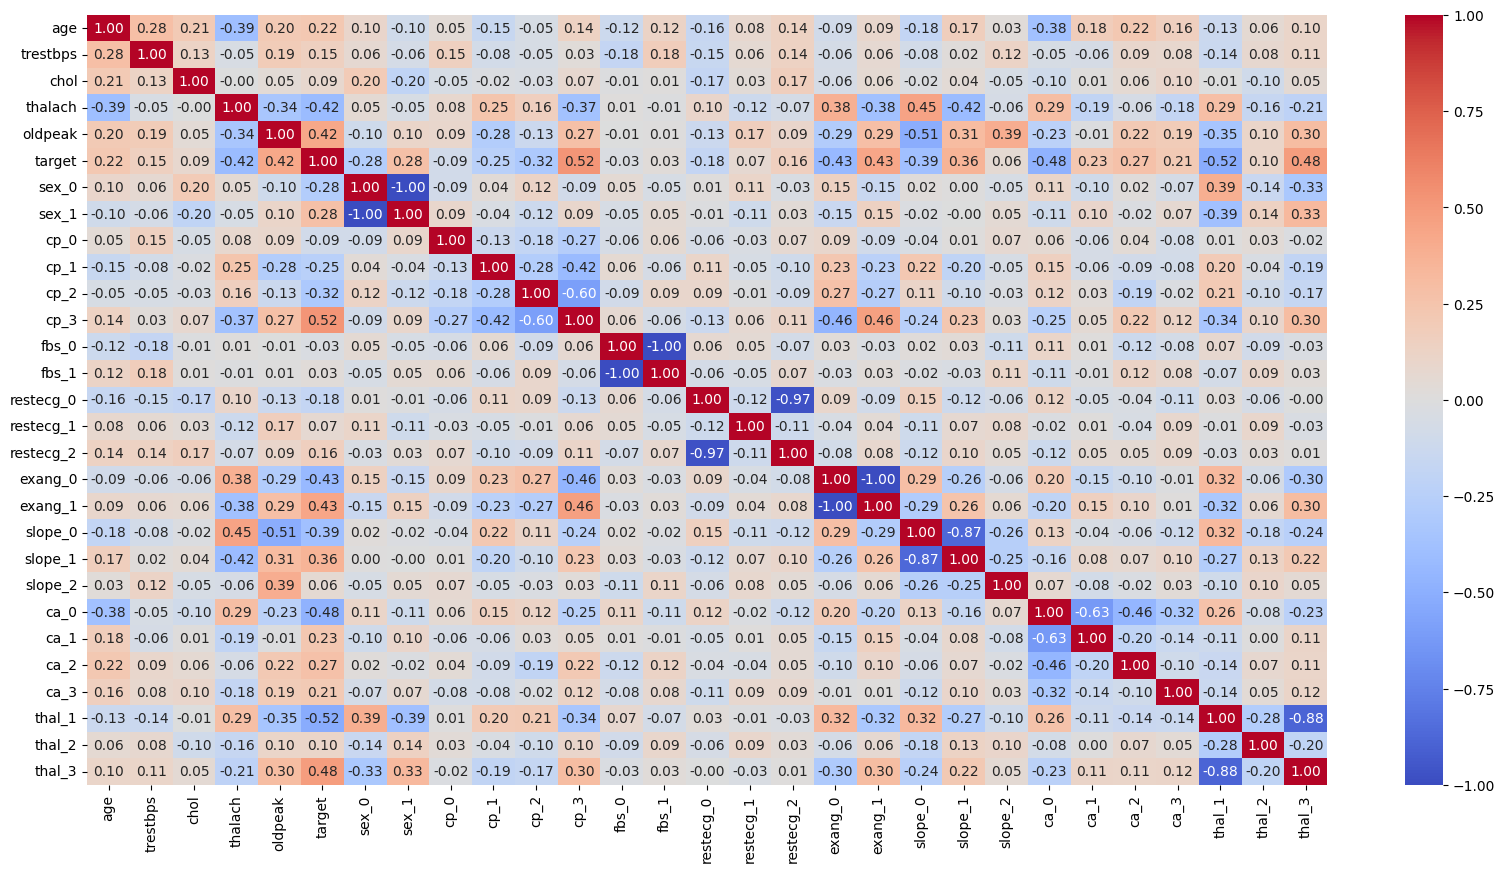

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [10]:
target_index = data.columns.get_loc('target')

columns_after_target = data.columns[target_index+1:]

In [11]:
columns_after_target

Index(['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [12]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
1,67,160,286,108,1.5,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,120,229,129,2.6,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130,250,187,3.5,0,False,True,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,130,204,172,1.4,0,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,False,True,True,False,...,False,True,False,True,False,False,False,False,False,True
299,68,144,193,141,3.4,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
300,57,130,131,115,1.2,1,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,236,174,0.0,1,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [13]:
# Вибір числових ознак для стандартизації
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Вибір категоріальних ознак
categorical_columns = columns_after_target.values

# Стандартизація лише числових ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

# Перетворення змасштабованих даних у DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

# Додавання категоріальних ознак до DataFrame
for column in categorical_columns:
    X_scaled_df[column] = data[column]

X_scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,False,True,True,False,False,...,False,False,True,True,False,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,False,True,False,False,True,...,False,False,True,True,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,False,True,True,False,False,...,False,True,False,True,False,False,False,False,False,True
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False


Оптимальна кількість компонент за допомогою PCA: 14


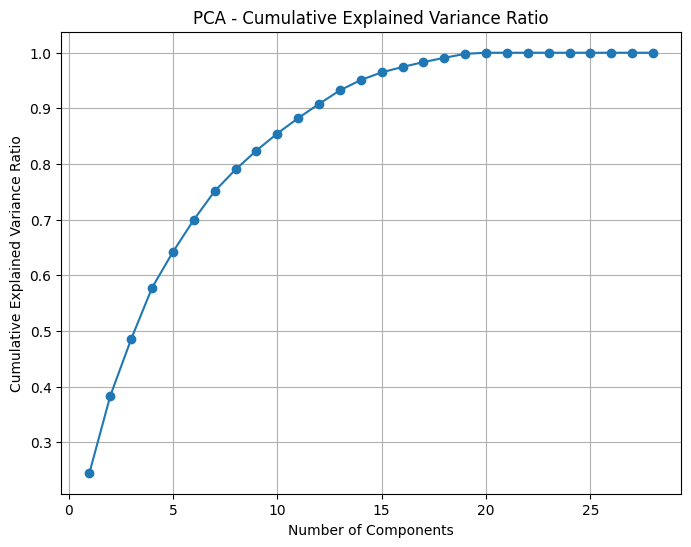

In [14]:
y = data['target']

# PCA
pca = PCA()
pca.fit(X_scaled_df, y)

# Кумулятивна сума дисперсії
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Знаходження оптимальної кількості компонент
optimal_num_components_pca = np.argmax(cumulative_variance_ratio > 0.95) + 1
print("Оптимальна кількість компонент за допомогою PCA:", optimal_num_components_pca)

# Візуалізація
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [15]:
pca.explained_variance_ratio_

array([2.45323500e-01, 1.38376786e-01, 1.01923707e-01, 9.21721076e-02,
       6.43545699e-02, 5.77785171e-02, 5.14074065e-02, 3.88655290e-02,
       3.40913370e-02, 3.05572046e-02, 2.76766832e-02, 2.55821544e-02,
       2.42762675e-02, 1.86552964e-02, 1.36300212e-02, 9.75717372e-03,
       8.77914178e-03, 7.65088242e-03, 7.13751513e-03, 2.00419993e-03,
       1.96928406e-33, 1.71754797e-33, 1.43577986e-33, 1.33325218e-33,
       1.33325218e-33, 1.33325218e-33, 1.33325218e-33, 1.33325218e-33])

In [19]:
def evaluate_classifiers(X: np.ndarray, y: np.ndarray, param_grids: Dict[str, Tuple[Any, Dict[str, Any]]]) -> pd.DataFrame:
    metrics_data: List[Dict[str, Any]] = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for clf_name, (clf, params) in param_grids.items():
            print(f"Training {clf_name}...")
            grid_search = GridSearchCV(clf, params, cv=10)
            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            best_estimator = grid_search.best_estimator_

            # Оцінка на тестовому наборі
            y_pred = best_estimator.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_pred)
            train_accuracy = accuracy_score(y_train, best_estimator.predict(X_train))

            # Обчислення метрик
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print(classification_report(y_test, y_pred))
            report_dict = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)

            # Перетворення словника в DataFrame
            report_df = pd.DataFrame(report_dict).transpose()
            report_df.drop('accuracy', axis=0, inplace=True)

            metrics_data.append({'Model': clf_name,
                                 'Best Parameters': best_params,
                                 'Test Accuracy': test_accuracy,
                                 'Train Accuracy': train_accuracy
                                  })

            print(f"Best parameters for {clf_name}: {best_params}")
            print(f"Test accuracy for {clf_name}: {test_accuracy}")
            print("Precision:", precision)
            print("Recall:", recall)
            print("F1-score:", f1)
            print()

            conf_matrix = confusion_matrix(y_test, y_pred)

            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.xlabel('Predicted labels')
            plt.ylabel('True labels')
            plt.title('Confusion Matrix')
            plt.show()

    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

In [20]:
# Параметри для моделей
classifiers: Dict[str, Tuple[Any, Dict[str, Any]]] = {
    "LR": (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    "DT": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10],
                                      'min_samples_leaf': [1, 2, 4]}),
    "RF": (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30, 40],
                                      'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}),
    "SVM": (SVC(), {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'gamma': ['scale', 'auto'], 'degree': [2, 3, 4]}),
    "K-NN": (KNeighborsClassifier(), {'n_neighbors': np.arange(1, 21), 'weights': ['uniform', 'distance'],
                                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']})
}

15
Training LR...
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Best parameters for LR: {'C': 10}
Test accuracy for LR: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375



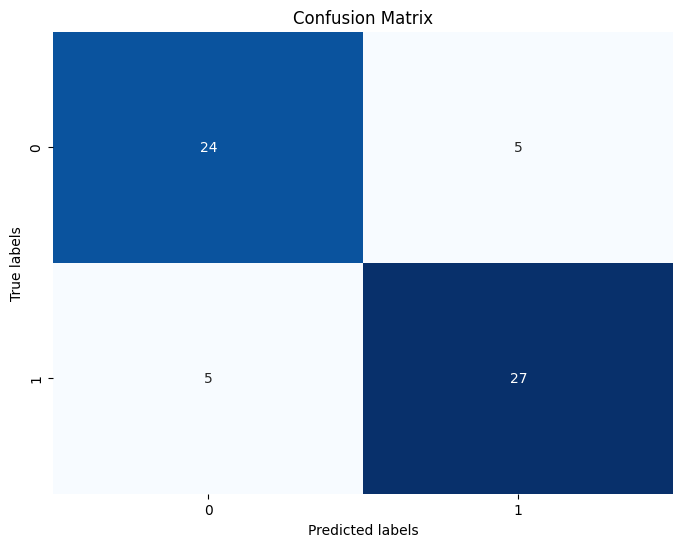

Training DT...
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.83      0.62      0.71        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.76      0.74      0.73        61

Best parameters for DT: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test accuracy for DT: 0.7377049180327869
Precision: 0.8333333333333334
Recall: 0.625
F1-score: 0.7142857142857143



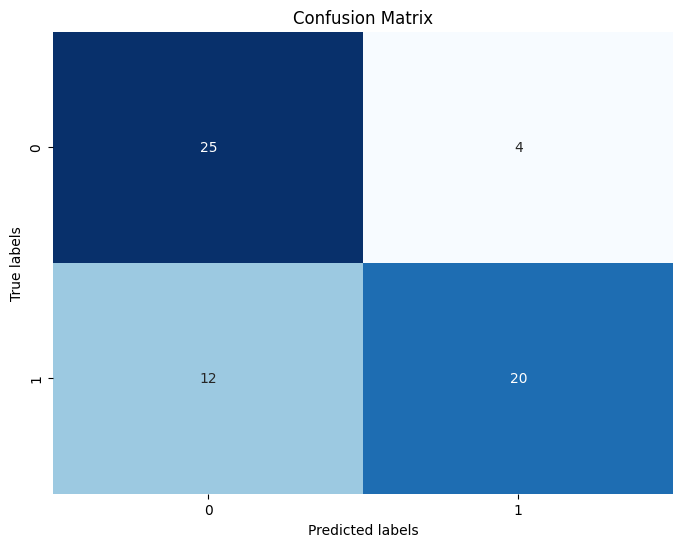

Training RF...
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Best parameters for RF: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test accuracy for RF: 0.8524590163934426
Precision: 0.9259259259259259
Recall: 0.78125
F1-score: 0.847457627118644



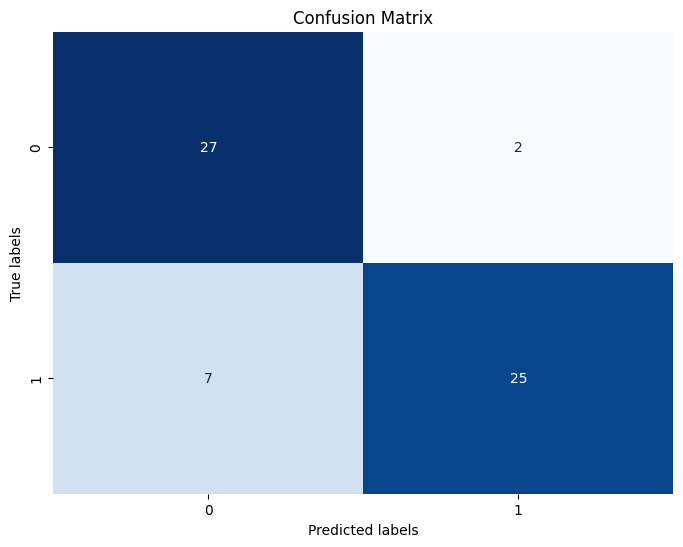

Training SVM...
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Best parameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy for SVM: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375



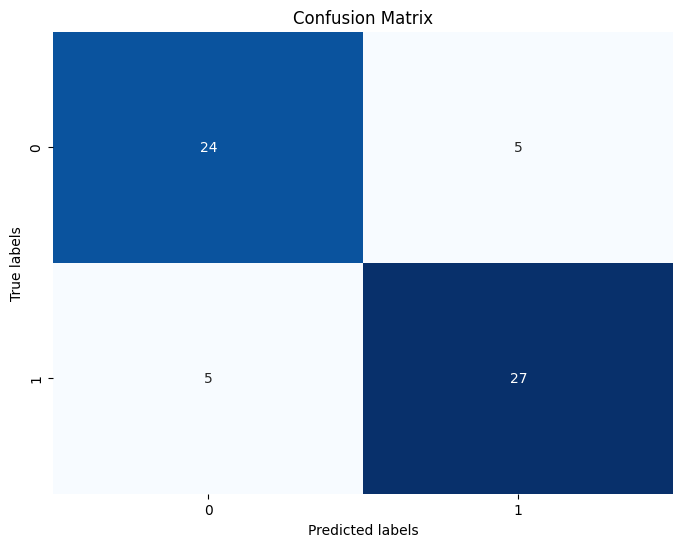

Training K-NN...
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Best parameters for K-NN: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Test accuracy for K-NN: 0.9016393442622951
Precision: 0.9333333333333333
Recall: 0.875
F1-score: 0.9032258064516129



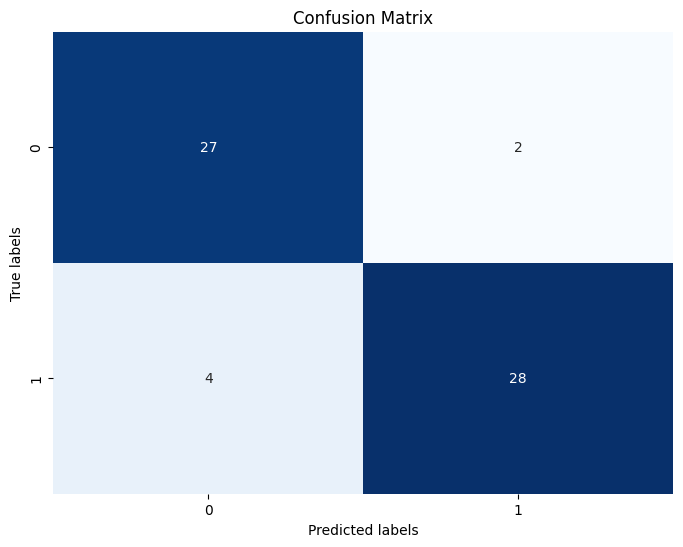

,Model,Best Parameters,Test Accuracy,Train Accuracy
0,LR,{'C': 10},0.836066,0.847107
1,DT,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.737705,0.917355
2,RF,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.852459,1.000000
3,SVM,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kerne...",0.836066,0.847107
4,K-NN,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.901639,0.896694


In [ ]:
n: int = 15

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

for column in categorical_columns:
    X_scaled_df[column] = data[column]

pca = PCA(n_components=n)
X_pca: np.ndarray = pca.fit_transform(X_scaled_df)
X_pca_df: pd.DataFrame = pd.DataFrame(data=X_pca, columns=[str(f'PCA{i + 1}') for i in range(n)])
X_pca_df["target"] = data["target"]

metrics_df_standard = evaluate_classifiers(X_pca_df.drop('target', axis=1), X_pca_df["target"], classifiers)
metrics_df_standard

In [ ]:
chunks = np.array_split(metrics_df, len([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]))

for i, chunk in enumerate(chunks):
    print(f"n_components {14+i}:")
    print(chunk)
    print("\n")

n_components 14:
  Model                                    Best Parameters  Test Accuracy
0    LR                                          {'C': 10}       0.852459
1    DT  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...       0.754098
2    RF  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...       0.868852
3   SVM  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kern...       0.836066
4  K-NN  {'algorithm': 'auto', 'n_neighbors': 13, 'weig...       0.836066


n_components 15:
  Model                                    Best Parameters  Test Accuracy
5    LR                                           {'C': 1}       0.836066
6    DT  {'max_depth': None, 'min_samples_leaf': 2, 'mi...       0.721311
7    RF  {'max_depth': None, 'min_samples_leaf': 1, 'mi...       0.852459
8   SVM  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kern...       0.819672
9  K-NN  {'algorithm': 'auto', 'n_neighbors': 14, 'weig...       0.885246


n_components 16:
   Model                                    Best Paramete

In [ ]:
chunks = np.array_split(metrics_df, 8)

for i, chunk in enumerate(chunks):
    print(f"n_components {14+i}:")
    print(chunk)
    print("\n")

n_components 14:
  Model                                    Best Parameters  Test Accuracy
0    LR                                          {'C': 10}       0.852459
1    DT  {'max_depth': 40, 'min_samples_leaf': 2, 'min_...       0.721311
2    RF  {'max_depth': 30, 'min_samples_leaf': 1, 'min_...       0.819672
3   SVM  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kern...       0.852459
4  K-NN  {'algorithm': 'auto', 'n_neighbors': 14, 'weig...       0.868852


n_components 15:
  Model                                    Best Parameters  Test Accuracy
5    LR                                          {'C': 10}       0.836066
6    DT  {'max_depth': None, 'min_samples_leaf': 2, 'mi...       0.737705
7    RF  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...       0.852459
8   SVM  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kerne...       0.836066
9  K-NN  {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...       0.901639


n_components 16:
   Model                                    Best Paramete

Training LR...
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Best parameters for LR: {'C': 100}
Test accuracy for LR: 0.819672131147541
Precision: 0.8181818181818182
Recall: 0.84375
F1-score: 0.8307692307692308



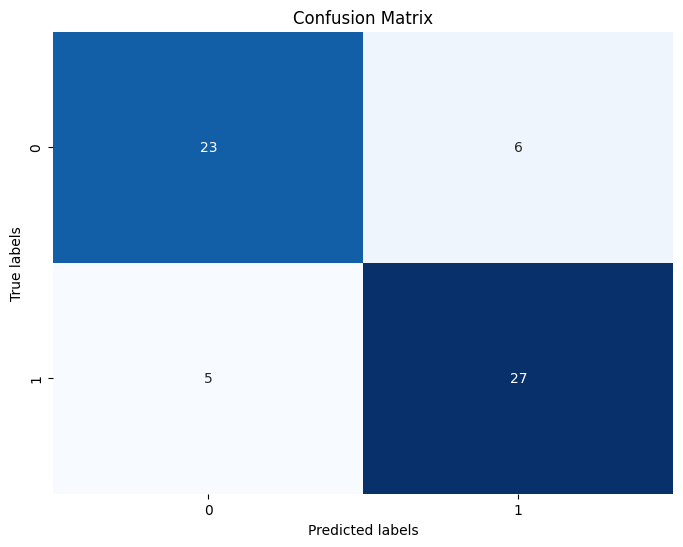

Training DT...
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

Best parameters for DT: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test accuracy for DT: 0.7704918032786885
Precision: 0.8461538461538461
Recall: 0.6875
F1-score: 0.7586206896551724



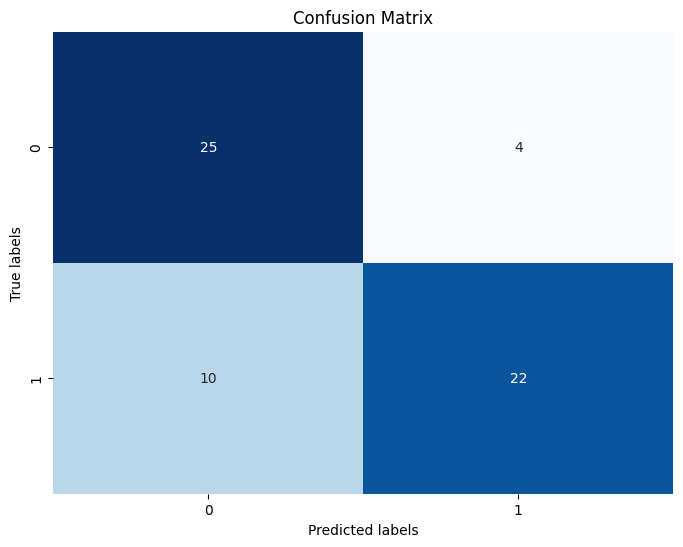

Training RF...
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Best parameters for RF: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test accuracy for RF: 0.8852459016393442
Precision: 0.9310344827586207
Recall: 0.84375
F1-score: 0.8852459016393444



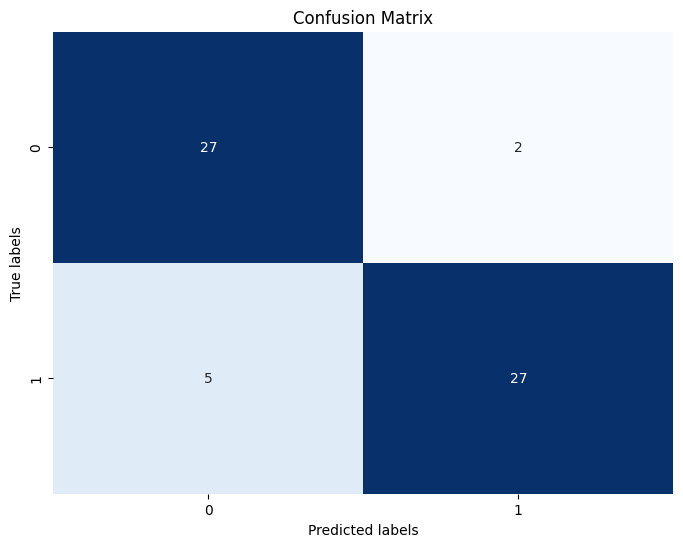

Training SVM...
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Best parameters for SVM: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy for SVM: 0.8032786885245902
Precision: 0.8333333333333334
Recall: 0.78125
F1-score: 0.8064516129032259



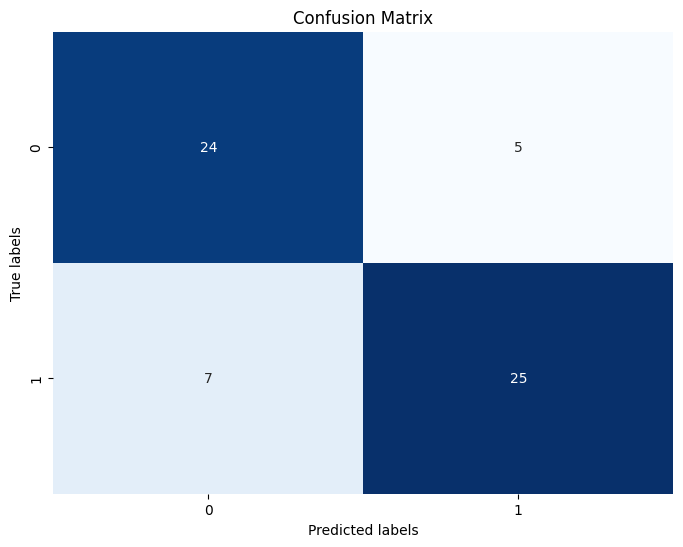

Training K-NN...
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Best parameters for K-NN: {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
Test accuracy for K-NN: 0.9016393442622951
Precision: 0.9333333333333333
Recall: 0.875
F1-score: 0.9032258064516129



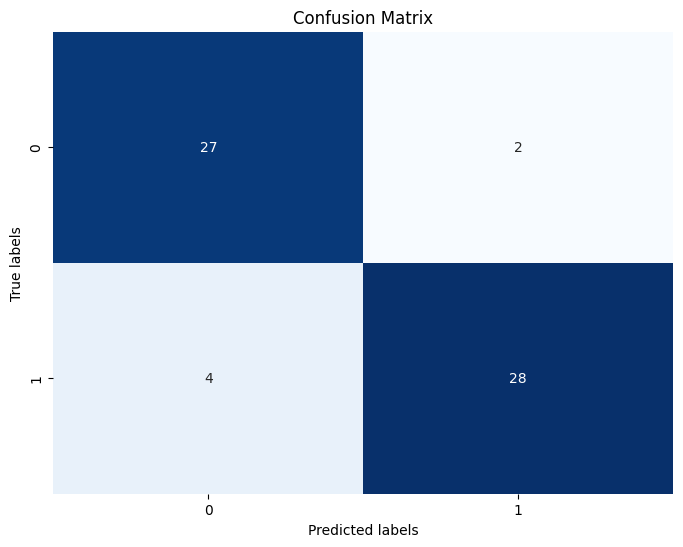

,Model,Best Parameters,Test Accuracy,Train Accuracy
0,LR,{'C': 100},0.819672,0.880165
1,DT,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.770492,0.888430
2,RF,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.885246,0.983471
3,SVM,"{'C': 100, 'degree': 2, 'gamma': 'scale', 'ker...",0.803279,0.888430
4,K-NN,"{'algorithm': 'auto', 'n_neighbors': 6, 'weigh...",0.901639,1.000000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

for column in categorical_columns:
    X_scaled_df[column] = data[column]

metrics_df_standard = evaluate_classifiers(X_scaled_df, data["target"], classifiers)
metrics_df_standard

Training LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Best parameters for LR: {'C': 100}
Test accuracy for LR: 0.819672131147541
Precision: 0.8181818181818182
Recall: 0.84375
F1-score: 0.8307692307692308



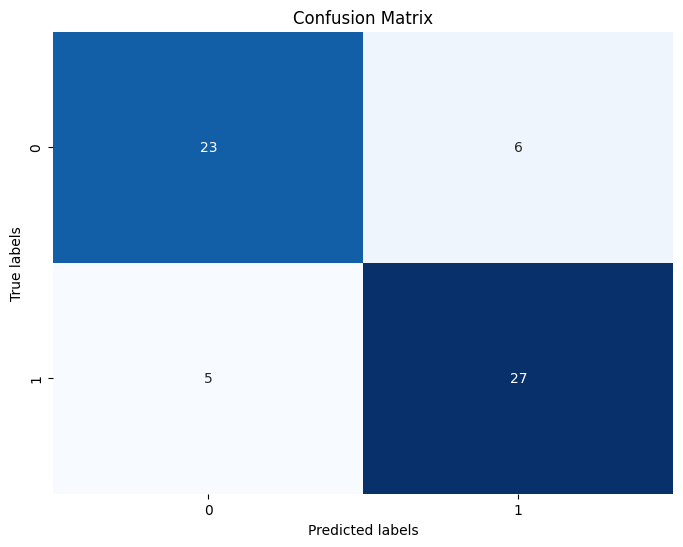

Training DT...
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.81      0.69      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

Best parameters for DT: {'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test accuracy for DT: 0.7540983606557377
Precision: 0.8148148148148148
Recall: 0.6875
F1-score: 0.7457627118644067



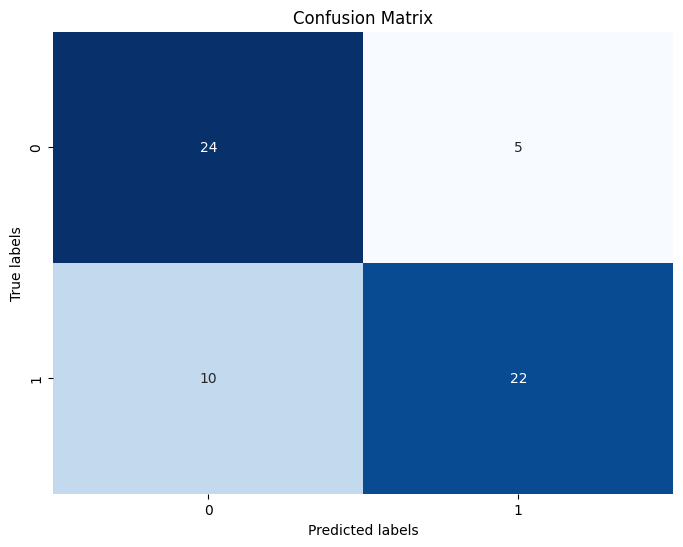

Training RF...
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Best parameters for RF: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test accuracy for RF: 0.8852459016393442
Precision: 0.9032258064516129
Recall: 0.875
F1-score: 0.8888888888888888



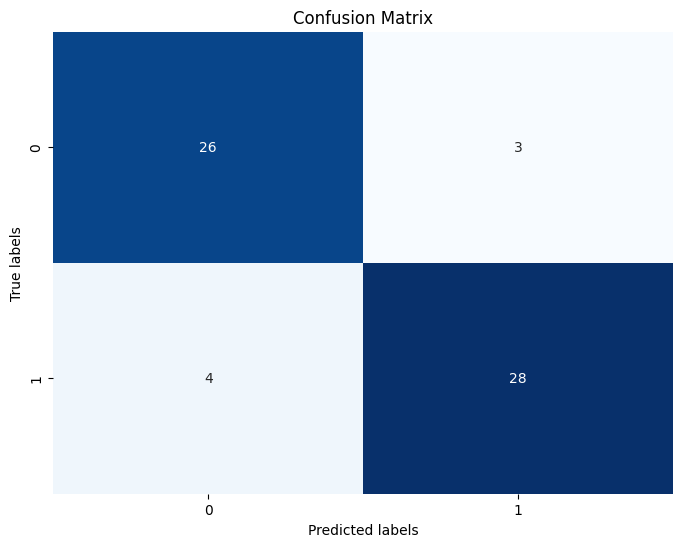

Training SVM...
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Best parameters for SVM: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy for SVM: 0.8032786885245902
Precision: 0.8333333333333334
Recall: 0.78125
F1-score: 0.8064516129032259



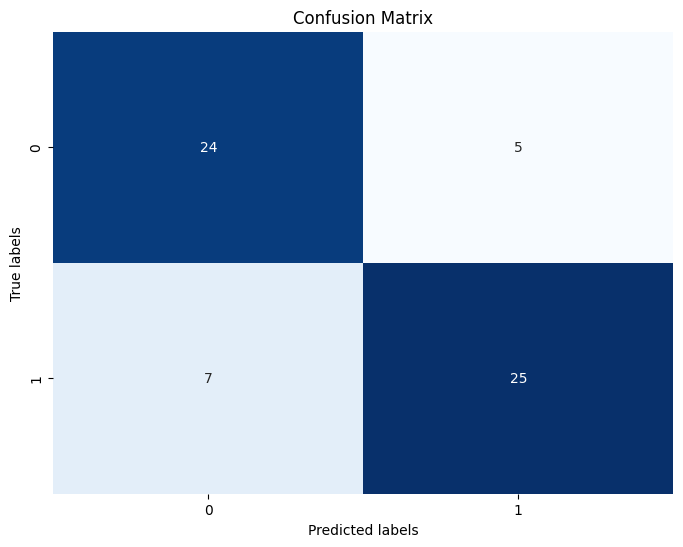

Training K-NN...
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Best parameters for K-NN: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}
Test accuracy for K-NN: 0.8852459016393442
Precision: 0.9310344827586207
Recall: 0.84375
F1-score: 0.8852459016393444



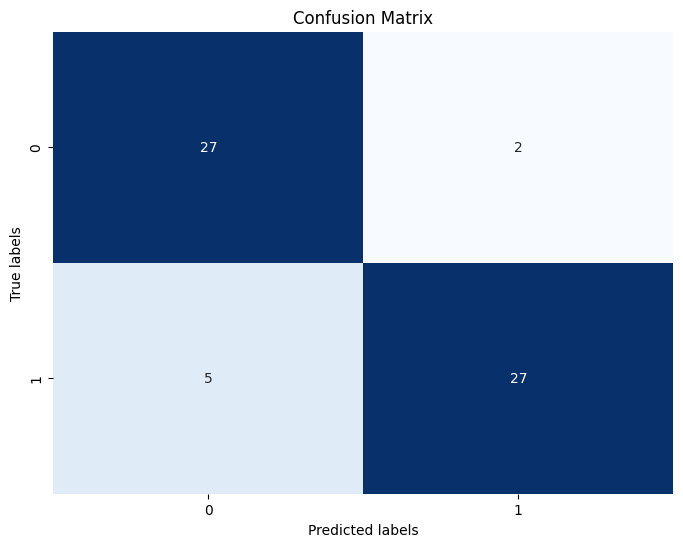

,Model,Best Parameters,Test Accuracy,Train Accuracy
0,LR,{'C': 100},0.819672,0.880165
1,DT,"{'max_depth': 50, 'min_samples_leaf': 4, 'min_...",0.754098,0.888430
2,RF,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.885246,0.975207
3,SVM,"{'C': 100, 'degree': 2, 'gamma': 'scale', 'ker...",0.803279,0.888430
4,K-NN,"{'algorithm': 'auto', 'n_neighbors': 15, 'weig...",0.885246,1.000000


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

for column in categorical_columns:
    X_scaled_df[column] = data[column]

metrics_df_standard = evaluate_classifiers(X_scaled_df, data["target"], classifiers)
metrics_df_standardMinMaxScaler

In [ ]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical_columns = columns_after_target.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

for column in categorical_columns:
    X_scaled_df[column] = data[column]

X_scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,False,True,True,False,False,...,False,False,True,True,False,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,False,True,False,False,True,...,False,False,True,True,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,False,True,True,False,False,...,False,True,False,True,False,False,False,False,False,True
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False


Trial 20 Complete [00h 00m 10s]
val_accuracy: 0.7650273243586222

Best val_accuracy So Far: 0.8907103935877482
Total elapsed time: 00h 02m 44s
2/2 [==============================] - 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

Confusion Matrix:
[[28  1]
 [ 5 27]]


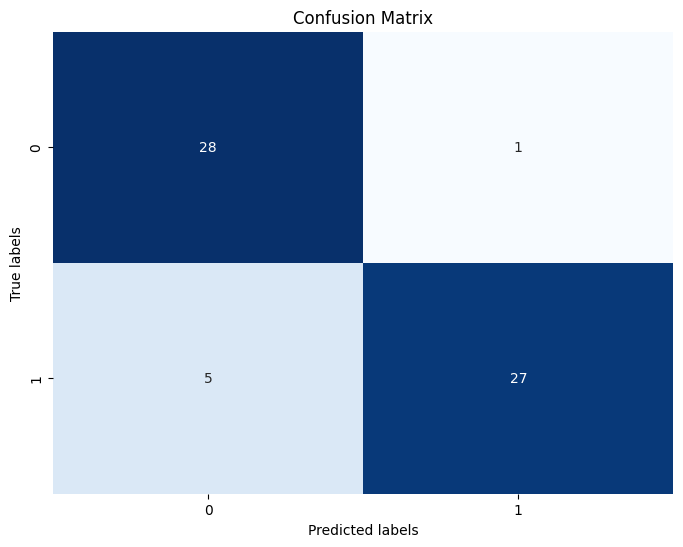

Test accuracy for Dense neural network: 0.9016393423080444
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7eb4284da920>


In [ ]:
def load_data(file_path: str) -> pd.DataFrame:
    """Завантаження даних з CSV файлу."""
    return pd.read_csv(file_path)


def preprocess_data(data: pd.DataFrame, scaler_type: str = 'standard') -> pd.DataFrame:
    """Попередня обробка та підготовка даних."""
    data.rename(columns = {'condition':'target'}, inplace = True)

    categorys= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

    df_encoded = pd.get_dummies(data, columns=categorys)
    data = df_encoded

    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler_type. Please choose 'standard' or 'minmax'.")

    numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    target_index = data.columns.get_loc('target')

    columns_after_target = data.columns[target_index+1:]

    categorical_columns = columns_after_target.values

    X_scaled = scaler.fit_transform(data[numeric_columns])

    X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

    for column in categorical_columns:
        X_scaled_df[column] = data[column]

    return X_scaled_df, data['target']


def apply_pca(X: np.ndarray, n_components: int) -> pd.DataFrame:
    """Застосування PCA."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return pd.DataFrame(data=X_pca, columns=[f'PCA{i + 1}' for i in range(n_components)])


def split_data(X: pd.DataFrame, y: pd.Series, test_size: float, random_state: int) -> tuple:
    """Розділення даних на навчальний та тестовий набори."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def build_model(hp, input_shape: tuple) -> keras.Sequential:
    """Побудова та налаштування моделі."""
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 64, 256, step=64), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


def train_model(project_name: str, X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series, epochs: int, batch_size: int) -> tuple:
    """Тренування моделі."""
    input_shape = X_train.shape[1]

    tuner = BayesianOptimization(
        lambda hp: build_model(input_shape=input_shape, hp=hp),
        objective='val_accuracy',
        max_trials=20,
        executions_per_trial=3,
        directory='my_dir',
        project_name=project_name
    )

    tuner.search(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size)

    best_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

    test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
    train_loss, train_accuracy = best_model.evaluate(X_train, y_train)
    predictions = (best_model.predict(X_test) > 0.5).astype("int32")

    return test_loss, test_accuracy, train_loss, train_accuracy, predictions, best_model, best_hyperparameters


def evaluate_model(y_test: pd.Series, predictions: np.ndarray) -> tuple:
    """Оцінка моделі."""
    classification_rep = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    return classification_rep, conf_matrix

def visualize_results(conf_matrix: np.ndarray) -> None:
    """Візуалізація результатів."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


data = load_data('/content/Heart_disease_cleveland_new.csv')
X, y = preprocess_data(data, scaler_type='standard')

n_components = 15
X_pca_df = apply_pca(X, n_components)

X_train, X_test, y_train, y_test = split_data(X_pca_df, y, test_size=0.2, random_state=42)

test_loss, test_accuracy, train_loss, train_accuracy, predictions, best_model, best_hyperparameters = train_model('heart_disease_classification_pca_std',
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, epochs=10, batch_size=16)

classification_rep, conf_matrix = evaluate_model(y_test, predictions)

print("Classification Report:", classification_rep)

visualize_results(conf_matrix)

print("Test accuracy for Dense neural network:", test_accuracy)
print("Best hyperparameters:", best_hyperparameters)

In [ ]:
# Отримання summary найкращої моделі
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1089 (4.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"Best hyperparameters: {best_hyperparameters.values}")

Best hyperparameters: {'num_layers': 1, 'units_0': 64, 'learning_rate': 0.01, 'units_1': 64, 'units_2': 64, 'units_3': 64, 'units_4': 64}


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=16)
loss, accuracy = model.evaluate(X_test, y_test)
loss_1, accuracy_1 = model.evaluate(X_train, y_train)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
print(f'Train loss: {loss_1}, Train accuracy: {accuracy_1}')

predictions = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.6542 - accuracy: 0.6322
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7273
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7851
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8182
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8347
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8388
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8471
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8554
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8554
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8719
Test loss: 0.36144068

Confusion Matrix:
[[27  2]
 [ 4 28]]


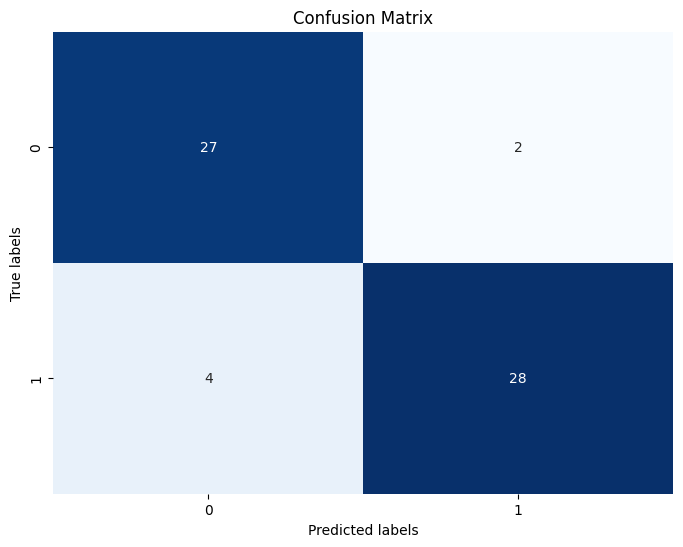

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical_columns = columns_after_target.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

for column in categorical_columns:
    X_scaled_df[column] = data[column]

X_scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,False,True,True,False,False,...,False,False,True,True,False,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,False,True,False,False,True,...,False,False,True,True,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,False,True,True,False,False,...,False,True,False,True,False,False,False,False,False,True
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
X_scaled_df = X_scaled_df.astype(float)
X_scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Trial 19 Complete [00h 00m 07s]
val_accuracy: 0.8934426307678223

Best val_accuracy So Far: 0.8934426307678223
Total elapsed time: 00h 01m 53s
2/2 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
[[26  3]
 [ 3 29]]


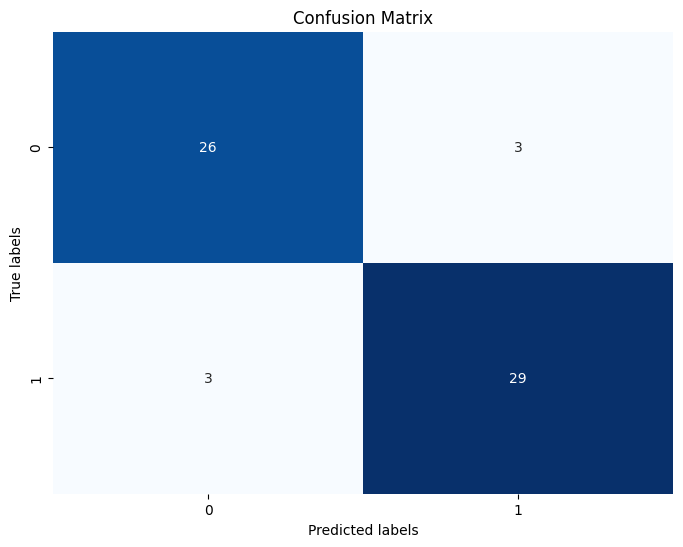

Test accuracy for Dense neural network: 0.9016393423080444
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7eb404c8bd90>


In [ ]:
X, y = preprocess_data(data, scaler_type='standard')

X_train, X_test, y_train, y_test = split_data(X.astype(float), y, test_size=0.2, random_state=42)

test_loss, test_accuracy, train_loss, train_accuracy, predictions, best_model, best_hyperparameters = train_model('heart_disease_classification_std',
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, epochs=10, batch_size=16)

classification_rep, conf_matrix = evaluate_model(y_test, predictions)

print("Classification Report:", classification_rep)

visualize_results(conf_matrix)

print("Test accuracy for Dense neural network:", test_accuracy)
print("Best hyperparameters:", best_hyperparameters)

In [ ]:
# Отримання summary найкращої моделі
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18561 (72.50 KB)
Trainable params: 18561 (

In [ ]:
print(f"Best hyperparameters: {best_hyperparameters.values}")

Best hyperparameters: {'num_layers': 5, 'units_0': 64, 'learning_rate': 0.001, 'units_1': 64, 'units_2': 64, 'units_3': 64, 'units_4': 64}


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(28,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=16)
loss, accuracy = model.evaluate(X_test, y_test)
loss_1, accuracy_1 = model.evaluate(X_train, y_train)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
print(f'Train loss: {loss_1}, Train accuracy: {accuracy_1}')

predictions = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_282 (Dense)           (None, 64)                1856      
                                                                 
 dense_283 (Dense)           (None, 64)                4160      
                                                                 
 dense_284 (Dense)           (None, 64)                4160      
                                                                 
 dense_285 (Dense)           (None, 64)                4160      
                                                                 
 dense_286 (Dense)           (None, 64)                4160      
                                                                 
 dense_287 (Dense)           (None, 1)                 65        
                                                                 
Total params: 18561 (72.50 KB)
Trainable params: 1856

Confusion Matrix:
[[26  3]
 [ 4 28]]


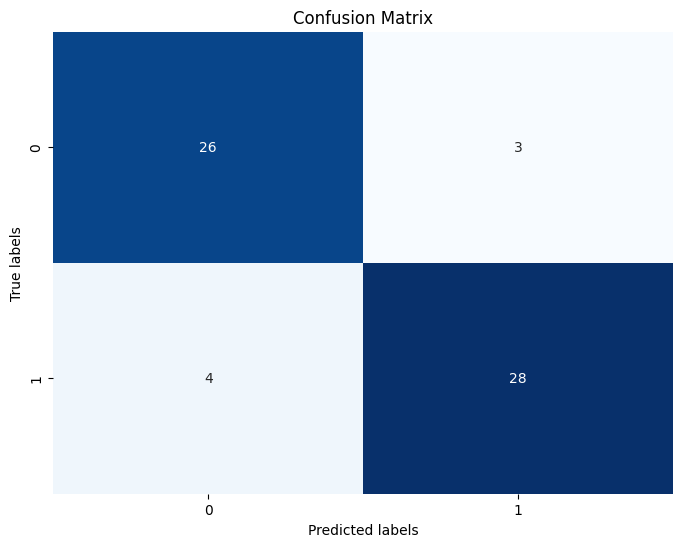

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical_columns = columns_after_target.values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

for column in categorical_columns:
    X_scaled_df[column] = data[column]

X_scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,False,True,True,False,False,...,False,False,True,True,False,False,False,False,True,False
1,0.791667,0.622642,0.365297,0.282443,0.241935,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0.791667,0.245283,0.235160,0.442748,0.419355,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0.166667,0.339623,0.283105,0.885496,0.564516,False,True,False,False,True,...,False,False,True,True,False,False,False,True,False,False
4,0.250000,0.339623,0.178082,0.770992,0.225806,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,False,True,True,False,False,...,False,True,False,True,False,False,False,False,False,True
299,0.812500,0.471698,0.152968,0.534351,0.548387,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
300,0.583333,0.339623,0.011416,0.335878,0.193548,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,0.583333,0.339623,0.251142,0.786260,0.000000,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
# Перетворення булевих змінних у числовий формат
X_scaled_df = X_scaled_df.astype(float)
X_scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,0.583333,0.339623,0.251142,0.786260,0.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Reloading Tuner from my_dir/heart_disease_classification_7/tuner0.json
2/2 [==============================] - 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
[[27  2]
 [ 3 29]]


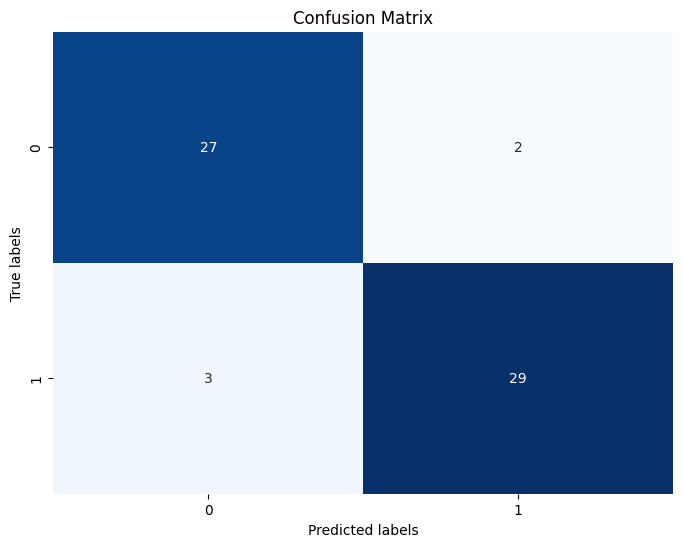

Test accuracy for Dense neural network: 0.9180327653884888
Train accuracy for Dense neural network: 0.8677685856819153
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7eb3ef200d00>


In [ ]:
X, y = preprocess_data(data, scaler_type='minmax')

X_train, X_test, y_train, y_test = split_data(X.astype(float), y, test_size=0.2, random_state=42)

test_loss, test_accuracy, train_loss, train_accuracy, predictions, best_model, best_hyperparameters = train_model('heart_disease_classification_minmax',
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, epochs=10, batch_size=16)

classification_rep, conf_matrix = evaluate_model(y_test, predictions)

print("Classification Report:", classification_rep)

visualize_results(conf_matrix)

print("Test accuracy for Dense neural network:", test_accuracy)
print("Best hyperparameters:", best_hyperparameters)

In [ ]:
# Отримання summary найкращої моделі
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(28,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=16)
loss, accuracy = model.evaluate(X_test, y_test)
loss_1, accuracy_1 = model.evaluate(X_train, y_train)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
print(f'Train loss: {loss_1}, Train accuracy: {accuracy_1}')

predictions = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Epoch 1/10
16/16 [==============================] - 1s 3ms/step - loss: 0.6645 - accuracy: 0.5909
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7934
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.8306
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8388
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.8347
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.8347
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8347
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8264
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8388
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8554
Test loss: 0.30129730

Confusion Matrix:
[[27  2]
 [ 3 29]]


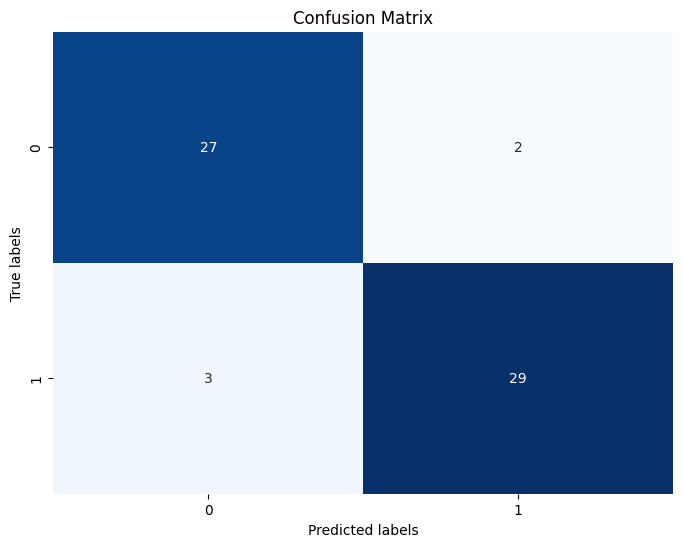

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [ ]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, folder_path))


folder_to_zip = '/content/my_dir'

output_zip = '/content/models.zip'

zip_folder(folder_to_zip, output_zip)

print("Папка успішно заархівована.")


Папка успішно заархівована.


In [ ]:
X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
X_scaled_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.82,-1.46,-2.25,-2.15,-2.33,-0.42,-1.00,-3.44,-0.70,-0.90,-0.98,-0.71,-0.87
25%,-0.71,-1.46,-0.17,-0.67,-0.69,-0.42,-1.00,-0.71,-0.70,-0.90,-0.98,-0.71,-0.87
50%,0.17,0.69,-0.17,-0.10,-0.11,-0.42,0.01,0.15,-0.70,-0.21,0.65,-0.71,-0.87
75%,0.73,0.69,0.88,0.47,0.55,-0.42,1.02,0.72,1.44,0.48,0.65,0.36,1.22
max,2.50,0.69,0.88,3.89,6.14,2.39,1.02,2.29,1.44,4.45,2.27,2.50,1.22


In [ ]:
X = data.drop('target', axis=1)
y = data['target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
X_scaled_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,0.53,0.68,0.72,0.36,0.28,0.15,0.50,0.60,0.33,0.17,0.30,0.22,0.42
std,0.19,0.47,0.32,0.17,0.12,0.36,0.50,0.17,0.47,0.19,0.31,0.31,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.00,0.67,0.25,0.19,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.00
50%,0.56,1.00,0.67,0.34,0.26,0.00,0.50,0.63,0.00,0.13,0.50,0.00,0.00
75%,0.67,1.00,1.00,0.43,0.34,0.00,1.00,0.73,1.00,0.26,0.50,0.33,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
